In [44]:
import pandas as pd 
import numpy as np
import os 
import sys 
job = '4080640'

# This jupyter file has code for all graphs and tables at the task level

In [45]:
# First 
from code.data_processing import get_all_datasets
x = get_all_datasets()
print(x)

['cleveland', 'ionosphere', 'ecoli', 'iris', 'mammo_graphic', 'wisconsin_breast_cancer', 'australia', 'postop', 'yeast', 'spec']


In [46]:
# First 
from code.data_processing import get_all_datasets

names = {} # index to string of names
datasets = get_all_datasets()
models = ['bag_model', 'nich_model', 'ccgp']
for i,model in enumerate(models):
    for j, dataset in enumerate(datasets):
        names[(i * len(datasets)) + j + 1] = f'{model}{dataset}'
print(names.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


In [47]:
# First load data in 
data = {}
for task in os.listdir(f'results_file/{job}/'):
    if len(os.listdir(f'results_file/{job}/{task}')) <= 1:
        continue 
    fn = [x for x in os.listdir(f'results_file/{job}/{task}/') if '.csv' in x][0] # currently these files only have one entry
    data[int(task)] = pd.read_csv(f'results_file/{job}/{task}/{fn}', index_col=False)
print(f'Number of results files in job {job} = {len(data)}')

Number of results files in job 4080640 = 27


In [48]:
sorted(list(data.keys()))

[1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [49]:
data[18]

,member_generation,training,seed,time,full_acc,majority_acc,minority_acc,tn,fp,fn,tp
0,True,True,0,-790.030946,0.278689,1.000000,0.000000,-1,-1,-1,-1
1,True,False,0,-790.030946,0.259259,1.000000,0.000000,-1,-1,-1,-1
2,True,True,0,-4.957661,0.672131,0.058824,0.909091,-1,-1,-1,-1
3,True,False,0,-4.957661,0.740741,0.000000,1.000000,-1,-1,-1,-1
4,True,True,169,-856.094026,0.278689,1.000000,0.000000,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
115,True,False,4732,-4.132023,0.703704,0.000000,0.950000,-1,-1,-1,-1
116,True,True,4901,-875.663522,0.278689,1.000000,0.000000,-1,-1,-1,-1
117,True,False,4901,-875.663522,0.259259,1.000000,0.000000,-1,-1,-1,-1
118,True,True,4901,-4.278965,0.721311,0.000000,1.000000,-1,-1,-1,-1


In [50]:
# method to efficently grab correct subsections from 
def get_data(task, member_generation=False, training=False, numpy=False):
    x = data[task]
    x = x[x['member_generation'] == member_generation] 
    if numpy:
        x = x[x['training'] == training].to_numpy() # [final]
    else:
        x = x[x['training'] == training] # [final]
    return x

In [59]:
data.keys()

dict_keys([20, 18, 27, 9, 11, 29, 16, 6, 28, 17, 1, 10, 19, 26, 8, 21, 30, 24, 4, 15, 3, 12, 2, 13, 5, 14, 25])

            0
0   32.111111
1   29.259259
2   51.072464
3   18.807175
4   36.355556
5   18.825112
6   35.751220
7   57.443902
8   36.370370
9   36.256039
10  47.755556
11  42.419753
12   9.479821
13  57.619512
14  42.814815
15  47.600000
16  42.518519
17  36.488889
18  40.000000
19  36.843373
20  38.217822
21  41.650943
22  50.528302
23  23.366337
24  47.526104
25  29.844444
26  49.413655


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

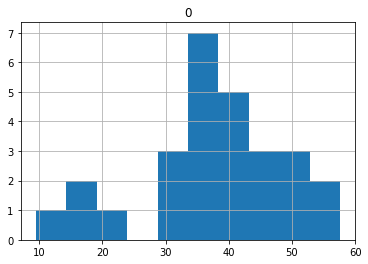

In [71]:
np_sel_test = np.array([get_data(z, member_generation=True)['full_acc'] for z in (data.keys())]).sum(axis=1)
np_sel_test
df = pd.DataFrame(data=np_sel_test)
print(df)
df.hist()

<AxesSubplot:xlabel='majority_acc', ylabel='minority_acc'>

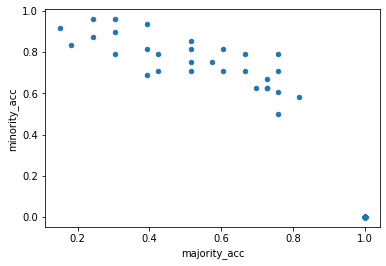

In [51]:
get_data(20, member_generation=True).plot.scatter(x='majority_acc', y='minority_acc') 

In [42]:
# Get the description for each. 
data2= []
for key in data.keys():
    try:
        data2.append(get_data(key, member_generation=True)['full_acc'].describe())
    except:
        pass

description = pd.DataFrame(data=data2)
description = description.reset_index()
description = description.drop(columns='index')
name_dict = {}
i = 0
for model in models:
    for dataset in datasets:
        name_dict[i] = dataset+'_'+model
        i += 1
description.rename(index=name_dict, inplace=True)
description

""


# Graphing a task

# Analysis of the description

This table shows the performance of the bag model on each dataset. Important aspects:
- yeast and spec both have the same accuracy within the quantiles, this suggests the model isn't correct. Potentially it only outputs 0 or 1. 
- The performance is not particularly impressive, maybe tuning the hyper parameters could be useful


